In [2]:
import pandas as pd
import numpy as np
import pandas_ta
import matplotlib.pyplot as plt
import gym
import os

In [2]:
df = pd.read_csv('./data/ADANIGREEN.csv')

In [19]:
open = df.loc[30-5: 30, 'volume'].values
open

array([  2214, 149288,  28111,  25125,  29512,  29975], dtype=int64)

In [7]:
sum(open)/len(open)

28.683333333333334

In [11]:
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 10000
current_step = 18
np.array([
            df.loc[current_step: current_step +
                        5, 'open'].values / MAX_SHARE_PRICE,
            df.loc[current_step: current_step +
                        5, 'high'].values / MAX_SHARE_PRICE,
            df.loc[current_step: current_step +
                        5, 'low'].values / MAX_SHARE_PRICE,
            df.loc[current_step: current_step +
                        5, 'close'].values / MAX_SHARE_PRICE,
            df.loc[current_step: current_step +
                        5, 'volume'].values / MAX_NUM_SHARES,
        ])

array([[2.95000000e-03, 2.85000000e-03, 2.86000000e-03, 2.85000000e-03,
        2.85000000e-03, 2.85000000e-03],
       [2.95000000e-03, 2.89500000e-03, 2.89000000e-03, 2.85500000e-03,
        2.85500000e-03, 2.86000000e-03],
       [2.85000000e-03, 2.85000000e-03, 2.85000000e-03, 2.85000000e-03,
        2.85000000e-03, 2.85000000e-03],
       [2.85000000e-03, 2.85500000e-03, 2.85000000e-03, 2.85000000e-03,
        2.85000000e-03, 2.85000000e-03],
       [2.03001779e-04, 3.97483818e-05, 4.61898744e-05, 3.48016620e-05,
        1.24243554e-04, 6.21145591e-06]])

In [13]:
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 10000
current_step = 18
np.array([
            df.loc[current_step: current_step +
                        5, 'open'].values,
            df.loc[current_step: current_step +
                        5, 'high'].values,
            df.loc[current_step: current_step +
                        5, 'low'].values,
            df.loc[current_step: current_step +
                        5, 'close'].values,
            df.loc[current_step: current_step +
                        5, 'volume'].values,
        ])

array([[2.95000e+01, 2.85000e+01, 2.86000e+01, 2.85000e+01, 2.85000e+01,
        2.85000e+01],
       [2.95000e+01, 2.89500e+01, 2.89000e+01, 2.85500e+01, 2.85500e+01,
        2.86000e+01],
       [2.85000e+01, 2.85000e+01, 2.85000e+01, 2.85000e+01, 2.85000e+01,
        2.85000e+01],
       [2.85000e+01, 2.85500e+01, 2.85000e+01, 2.85000e+01, 2.85000e+01,
        2.85000e+01],
       [4.35943e+05, 8.53590e+04, 9.91920e+04, 7.47360e+04, 2.66811e+05,
        1.33390e+04]])

In [24]:

current_step = 40
high = df.loc[current_step-13: current_step, 'high'].values
low = df.loc[current_step-13: current_step, 'low'].values


array([28.75, 28.85, 28.9 , 29.  , 29.9 , 29.5 , 29.75, 29.8 , 30.  ,
       30.85, 30.7 , 31.25, 31.25, 31.2 ])

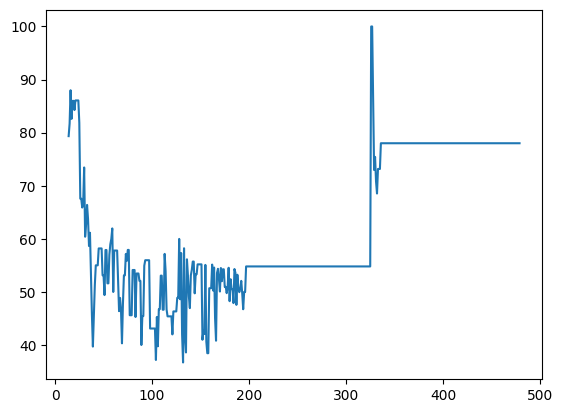

In [37]:
rsi = pandas_ta.rsi(df['close'][20:500], length=14)

x = [l for l in range(len(rsi))]
plt.plot(x, rsi)

In [59]:
current_step = 2000
rsi = pandas_ta.rsi(df['close'][current_step-20:current_step], length=14)
print(rsi[current_step-1])
rsi

49.419276313083266


1980          NaN
1981          NaN
1982          NaN
1983          NaN
1984          NaN
1985          NaN
1986          NaN
1987          NaN
1988          NaN
1989          NaN
1990          NaN
1991          NaN
1992          NaN
1993          NaN
1994    34.022109
1995    34.022109
1996    34.022109
1997    49.419276
1998    49.419276
1999    49.419276
Name: RSI_14, dtype: float64

In [ ]:
#macd
EMA_fast = pd.Series(df[column].ewm(ignore_na=False, span=period_fast, adjust=adjust).mean(),name="EMA_fast",)
EMA_slow = pd.Series(df[column].ewm(ignore_na=False, span=period_slow, adjust=adjust).mean(),name="EMA_slow",)
MACD = pd.Series(EMA_fast - EMA_slow, name="MACD")
MACD_signal = pd.Series(MACD.ewm(ignore_na=False, span=signal, adjust=adjust).mean(), name="SIGNAL")

pd.concat([MACD, MACD_signal], axis=1)
#but idk which column to use in this

In [15]:
import gym
from gym.spaces import Tuple, Discrete, Box

a = Box(-1, 1, (1,)).sample()
a

array([-0.20809074], dtype=float32)

In [9]:
for i in range(10):
    print(Tuple((Discrete(3), Box(0, 1, shape=(1,)))).sample())

(1, array([0.11516085], dtype=float32))
(1, array([0.22740272], dtype=float32))
(1, array([0.9052676], dtype=float32))
(2, array([0.31590453], dtype=float32))
(1, array([0.27181557], dtype=float32))
(0, array([0.25235388], dtype=float32))
(1, array([0.6124801], dtype=float32))
(2, array([0.773294], dtype=float32))
(1, array([0.73390615], dtype=float32))
(0, array([0.5705456], dtype=float32))


In [3]:
df = pd.read_csv('./data/ADANIPORTS.csv')
# Calculate the short term exponential moving average (EMA)
ShortEMA = df.close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average (EMA)
LongEMA = df.close.ewm(span=26, adjust=False).mean()
# Calculate the MACD line
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

In [5]:
MACD

0         0.000000
1         0.115670
2         0.153124
3         0.208643
4         0.098197
            ...   
651976    0.086659
651977    0.137658
651978    0.144136
651979    0.147569
651980    0.164532
Name: close, Length: 651981, dtype: float64

In [7]:
MACD[200]
signal[200]

-0.14737888933459836

Text(0.5, 1.0, 'Closing price of ADANIPORTS')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

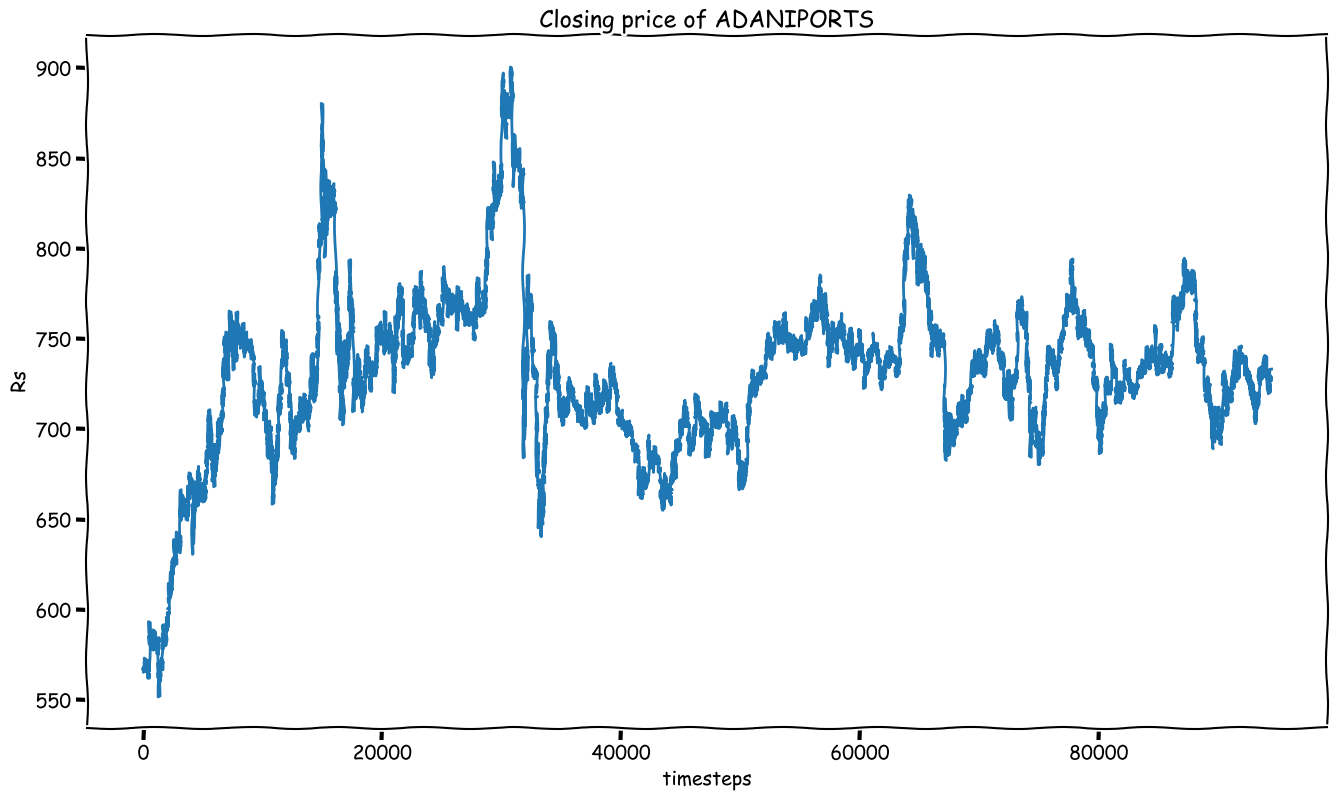

In [8]:
df = pd.read_csv('./data/ADANIPORTS.csv')

y = df['close'][555600:650000]
x =  [l for l in range(len(y))]
plt.xkcd()
plt.figure(figsize=(16,9))
plt.plot(x,y)
# plt.savefig('./close-plots/ADANIGREEN.png')
plt.xlabel('timesteps')
plt.ylabel('Rs')
plt.title('Closing price of ADANIPORTS')

In [ ]:
dataset_path = 'C:/Users/Rugved/Datasets/RL trading bot/minute_data/'
for i in os.listdir(dataset_path):
    df = pd.read_csv(dataset_path+i)
    y = df['close'][555600:650000]
    x =  [l for l in range(len(y))]
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    ii = i[:-4]
    print(ii)
    plt.savefig('./close-plots/'+ii+'.png')
#blank plot means data is not available

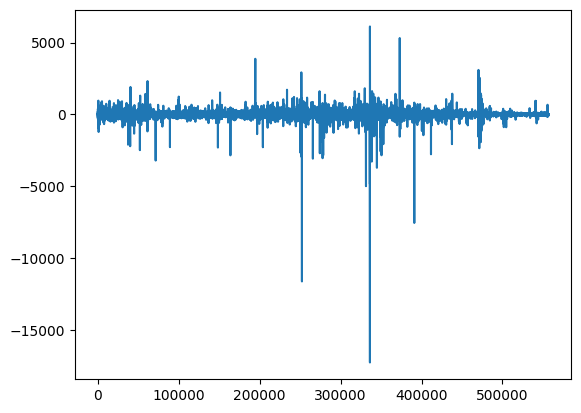

<Figure size 1600x900 with 0 Axes>

In [15]:
with open('./logs/log67training-rewards.txt', 'r') as log:
# with open('./logs/log67rewards.txt', 'r') as log:
# with open('./logs/log66actions.txt', 'r') as log:
    r = log.readlines()
    r =  [float(i[:-1]) for i in r]
    x =  [l for l in range(len(r))]
    # print(r)
    plt.plot(x, r)
    plt.figure(figsize=(16,9))
    # plt.savefig('./plots/log64training-rewards-plot.png')
    plt.show()

In [16]:
sum(r)/len(r)

-0.154905251895672

In [17]:
for i in range(50):
    print(i*10000)
    print(sum(r[i*10000:(i+1)*10000])/10000)
    print()

0
-0.2711829999999958

10000
0.1271739999999423

20000
0.9939930000000299

30000
0.2219780000000552

40000
-0.774881000000042

50000
0.7367410000000498

60000
-0.03873099999995902

70000
-0.39969599999997446

80000
-0.09224200000005076

90000
-0.044600999999983466

100000
0.39490499999998574

110000
-0.19052099999997882

120000
0.4609139999999985

130000
0.32459800000000105

140000
-0.39978099999998956

150000
0.12854900000004127

160000
-0.30035100000001697

170000
0.17912100000004574

180000
0.3455170000000013

190000
0.6468049999999784

200000
-0.345802999999997

210000
0.4164480000000578

220000
0.5952189999999886

230000
-0.6543479999999429

240000
0.6463609999999826

250000
-1.985134999999928

260000
0.20210999999998602

270000
-0.4539599999999453

280000
-0.5309449999999925

290000
-0.0684649999999674

300000
-0.4527299999999435

310000
1.1144800000000294

320000
0.3892700000000332

330000
-4.9599599999999615

340000
-0.787115000000022

350000
-0.8512849999999955

360000
0.26456

In [7]:
len(r)/10000

55.7056

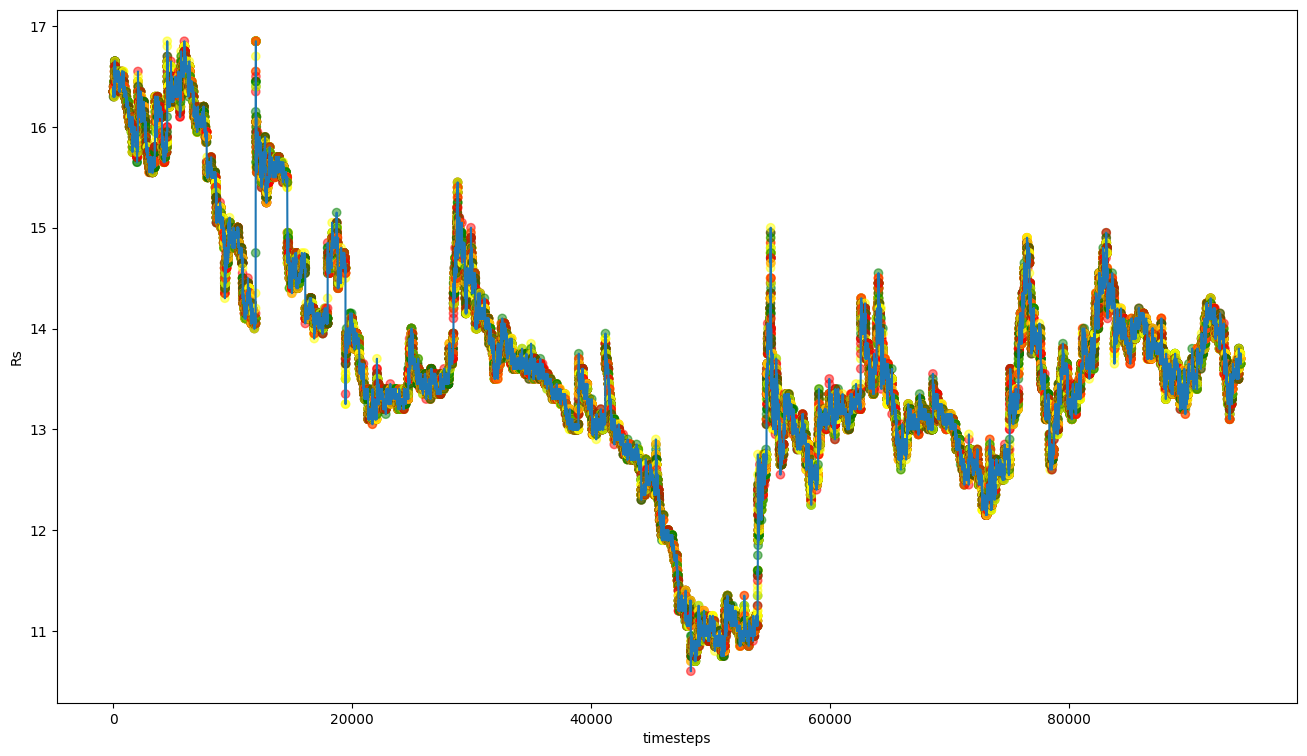

In [27]:
with open('./logs/log67actions.txt', 'r') as log:
    a = log.readlines()
    a =  [float(i[:-1]) for i in a]
    # x =  [l for l in range(len(a))]
    df = pd.read_csv('./data/YESBANK.csv')

    y = df['close'][557097:651497]
    x =  [l for l in range(len(y))]
    # plt.xkcd()
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    # plt.savefig('./close-plots/ADANIGREEN.png')
    plt.xlabel('timesteps')
    plt.ylabel('Rs')
    # plt.title('Closing price of ADANIPORTS')
    
    col =[]
  
    for i in range(0, len(x)):
        if a[i]<-0.33:
            col.append('red')  
        elif a[i]>0.33:
            col.append('green')
        else:
            col.append('yellow')
    
    # for i in range(len(x)):
    #     # plotting the corresponding x with y and respective color
    #     plt.scatter(x[i], y[i], c = col[i], s = 10, linewidth = 0)

    plt.scatter(x, y, c = col, alpha=0.5)
    plt.show()